## For this project, I will:
- define a regression or a classification problem
- choosing an evaluation metric
- establishing baseline predictions 
- fitting and evaluating tree-based models
- visualize feature relationships and models

In [1]:
import pandas as pd
import numpy as np 

# Set my index as the gameId col  
df = pd.read_csv('https://raw.githubusercontent.com/timrocar/Unit-2-Build/master/high_diamond_ranked_10min.csv',
                 index_col='gameId')

To begin to work on this project, I will first do some EDA, then wrangle my data. 

In [2]:
print(df.shape)
df.head()

(9879, 39)


,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
gameId,,,,,,,,,,,,,,,,,,,,,
4519157822,0,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
4523371949,0,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
4521474530,0,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
4524384067,0,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4436033771,0,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
#lowercase column headers for ease of typing
df.columns = map(str.lower, df.columns)
df.dtypes

bluewins                          int64
bluewardsplaced                   int64
bluewardsdestroyed                int64
bluefirstblood                    int64
bluekills                         int64
bluedeaths                        int64
blueassists                       int64
blueelitemonsters                 int64
bluedragons                       int64
blueheralds                       int64
bluetowersdestroyed               int64
bluetotalgold                     int64
blueavglevel                    float64
bluetotalexperience               int64
bluetotalminionskilled            int64
bluetotaljungleminionskilled      int64
bluegolddiff                      int64
blueexperiencediff                int64
bluecspermin                    float64
bluegoldpermin                  float64
redwardsplaced                    int64
redwardsdestroyed                 int64
redfirstblood                     int64
redkills                          int64
reddeaths                         int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9879 entries, 4519157822 to 4523772935
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bluewins                      9879 non-null   int64  
 1   bluewardsplaced               9879 non-null   int64  
 2   bluewardsdestroyed            9879 non-null   int64  
 3   bluefirstblood                9879 non-null   int64  
 4   bluekills                     9879 non-null   int64  
 5   bluedeaths                    9879 non-null   int64  
 6   blueassists                   9879 non-null   int64  
 7   blueelitemonsters             9879 non-null   int64  
 8   bluedragons                   9879 non-null   int64  
 9   blueheralds                   9879 non-null   int64  
 10  bluetowersdestroyed           9879 non-null   int64  
 11  bluetotalgold                 9879 non-null   int64  
 12  blueavglevel                  9879 non-null   f

I have no null values, great to see! 

In [5]:
pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in c:\users\timro\.virtualenvs\unit-2-build-y90-p50g\lib\site-packages (2.8.0)
Note: you may need to restart the kernel to use updated packages.


In [6]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report')
#profile.to_notebook_iframe()

With the help of some previous domain knowledge and the pandas profile report, I can see there are many repeated columns( many events on one team are inversely correlated to the other)
I will start by removing some of them(I will largely be removing the red half of these features)

In [7]:
repeated = ['redfirstblood', 'redkills', 'reddeaths', 'redgolddiff',
            'redexperiencediff', 'redcspermin',
           'blueavglevel', 'bluecspermin', 'redavglevel', 'bluegoldpermin', 'redgoldpermin']
df = df.drop(repeated, axis=1)

In [8]:
#bluewins will be my target 
df.bluewins.value_counts()

0    4949
1    4930
Name: bluewins, dtype: int64

My target vector, "bluewins", is a classification problem. 
- I will use accuracy as my metric
- I will use a random 80/20 train-validation split, will not exclude any observations. I will also split off a test set.

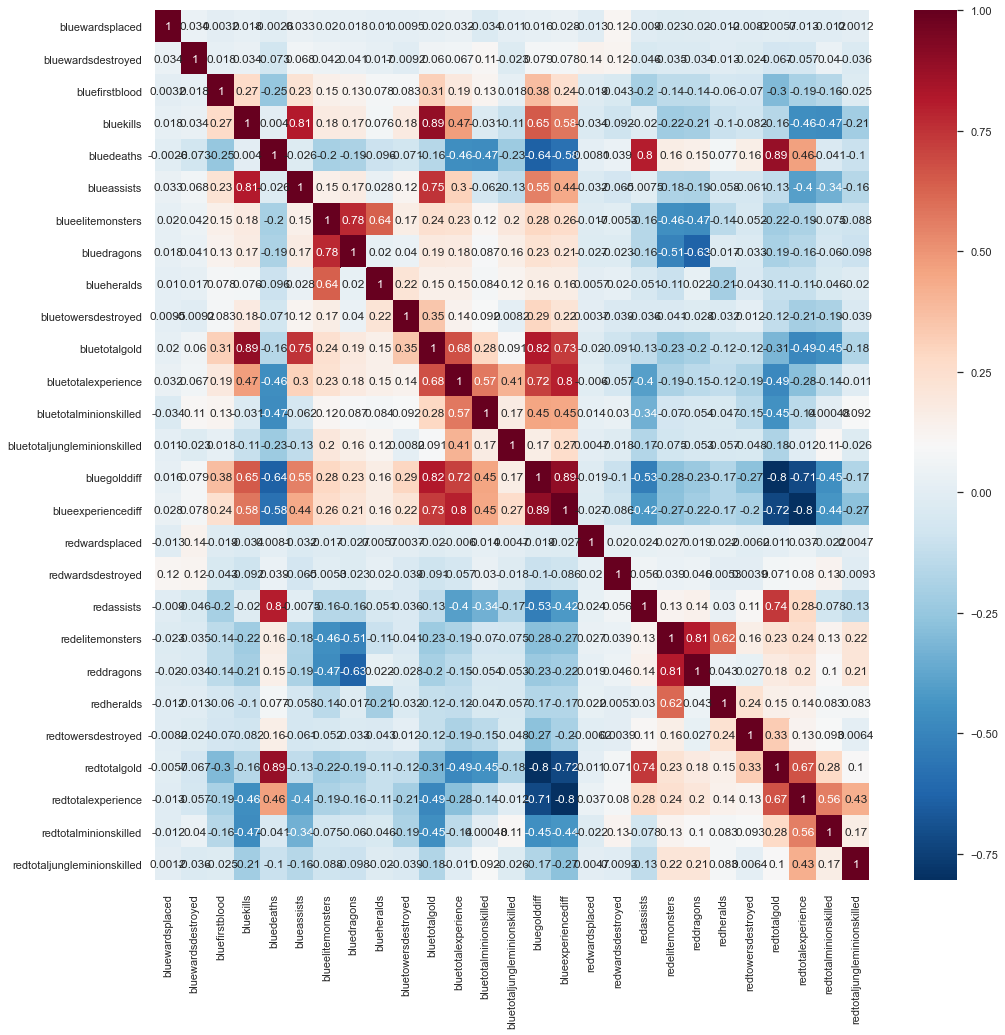

In [9]:
# Correlations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(16, 16))
sns.heatmap(df.drop('bluewins', axis=1).corr(), cmap="RdBu_r", annot =True)
plt.show()

I can drop some of the features with little correlation to my target vector

In [10]:
#first ill split off some test data
from sklearn.model_selection import train_test_split
train , test = train_test_split (df, test_size = .09, random_state=7)

In [11]:
print(test.shape)
test.head()

(890, 28)


,bluewins,bluewardsplaced,bluewardsdestroyed,bluefirstblood,bluekills,bluedeaths,blueassists,blueelitemonsters,bluedragons,blueheralds,...,redwardsdestroyed,redassists,redelitemonsters,reddragons,redheralds,redtowersdestroyed,redtotalgold,redtotalexperience,redtotalminionskilled,redtotaljungleminionskilled
gameId,,,,,,,,,,,,,,,,,,,,,
4467514491,1,20,2,1,9,7,14,1,1,0,...,2,8,0,0,0,0,16050,16682,205,35
4478080352,0,16,1,0,0,8,0,0,0,0,...,5,10,2,1,1,0,18252,19305,273,44
4475735084,1,21,6,0,7,4,11,0,0,0,...,7,3,1,1,0,0,15417,17987,230,56
4525786511,1,18,4,0,8,2,10,1,0,1,...,3,2,0,0,0,0,14895,17802,241,52
4517499041,0,12,3,1,3,4,4,1,1,0,...,1,6,0,0,0,0,15802,18570,247,52


In [12]:
corr = train[train.columns[1:]].apply(lambda x: x.corr(train['bluewins']))
cols = []
for col in corr.index:
    if (corr[col]>0.2 or corr[col]<-0.2):
        cols.append(col)
        
cols

['bluefirstblood',
 'bluekills',
 'bluedeaths',
 'blueassists',
 'blueelitemonsters',
 'bluedragons',
 'bluetotalgold',
 'bluetotalexperience',
 'bluetotalminionskilled',
 'bluegolddiff',
 'blueexperiencediff',
 'redassists',
 'redelitemonsters',
 'reddragons',
 'redtotalgold',
 'redtotalexperience',
 'redtotalminionskilled']

In [13]:
#need to make sure my test data has the same number of features as my training/validation data. 
testcols = cols + ['bluewins']

In [36]:
test = test[testcols]
df_new = train[cols]
print(df_new.shape)
df_new.head()

(8989, 17)


,bluefirstblood,bluekills,bluedeaths,blueassists,blueelitemonsters,bluedragons,bluetotalgold,bluetotalexperience,bluetotalminionskilled,bluegolddiff,blueexperiencediff,redassists,redelitemonsters,reddragons,redtotalgold,redtotalexperience,redtotalminionskilled
gameId,,,,,,,,,,,,,,,,,
4459302014,1,10,5,10,0,0,18588,18890,229,2824,1346,3,0,0,15764,17544,214
4521542969,1,6,4,10,2,1,17086,17746,229,1838,-689,7,0,0,15248,18435,231
4452166670,1,4,1,7,2,1,17320,18965,264,2850,1646,0,0,0,14470,17319,248
4502224154,0,4,3,5,1,0,15804,18509,228,606,820,5,1,1,15198,17689,210
4521698665,1,5,3,8,2,1,16321,18143,249,1151,-108,4,0,0,15170,18251,218


In [15]:
# Train-Test-Split for training/validation
X = df_new
y = train['bluewins']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 7)

In [37]:
# Baseline Accuracy

print('Baseline Accuracy:', y_train.value_counts(normalize=True).max())

Baseline Accuracy: 0.5010429703796412


### For my models, I will first create simple version, then I will use hyperparameters and grid/randomized searces to improve on them.

In [17]:
# Quick Model 

from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

quickmodel = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=7, max_depth=4)
)

quickmodel.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=4, random_state=7))])

In [18]:
print('Training Accuracy:', quickmodel.score(X_train, y_train))
print('Validation Accuracy:', quickmodel.score(X_val, y_val))

Training Accuracy: 0.737727715199555
Validation Accuracy: 0.7024471635150167


In [19]:
quickrfmodel = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    RandomForestClassifier(random_state=7, max_depth=4)
)

quickrfmodel.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=4, random_state=7))])

In [20]:
print('Training Accuracy:', quickrfmodel.score(X_train, y_train))
print('Validation Accuracy:', quickrfmodel.score(X_val, y_val))

Training Accuracy: 0.7442636629119733
Validation Accuracy: 0.7091212458286985


In [21]:
# Testing Boosting Classifiers!

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

XGB_model = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    XGBClassifier(random_state= 7, n_jobs=16, max_depth=6, learning_rate=0.003)
)

XGB_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.003,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=7,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [38]:
print('Training Accuracy:', XGB_model.score(X_train, y_train))
print('Validation Accuracy:', XGB_model.score(X_val, y_val))

Training Accuracy: 0.7598386872479488
Validation Accuracy: 0.7096774193548387


### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# I will just use a randomize grid search for my RandomForest Model and my XGBoost Model

params = {'randomforestclassifier__max_leaf_nodes': range(10, 500, 5),
          'randomforestclassifier__n_estimators': range(10,120,5),
          'randomforestclassifier__min_samples_leaf': range(1, 40, 1),
          'randomforestclassifier__min_samples_split': range(1,40, 1)}

tunedrf = RandomizedSearchCV(quickrfmodel,
                          param_distributions=params,
                          n_iter=100,
                          n_jobs=-1,
                          verbose=2)

tunedrf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 469 out of 500 | elapsed:    8.5s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.9s finished


RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=[],
                                                             mapping=[])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(max_depth=4,
                                                                     random_state=7))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestclassifier__max_leaf_nodes': range(10, 500, 5),
                                        'randomforestclassifier__min_samples_leaf': range(1, 40),
                                        'randomforestclassifier__min_samples_split': range(1, 40),
                                        'randomforestclassifier__n_estimators':

In [48]:
print(tunedrf.best_params_)
tunedrf_model = tunedrf.best_estimator_

{'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 8, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__max_leaf_nodes': 430}


In [50]:
print('Random Forest w/o randomized tuning:')
print('Training Accuracy:', quickrfmodel.score(X_train, y_train))
print('Validation Accuracy:', quickrfmodel.score(X_val, y_val))
print('Random Forest w randomized tuning:')
print('Training Accuracy:', tunedrf_model.score(X_train, y_train))
print('Validation Accuracy:', tunedrf_model.score(X_val, y_val))

Random Forest w/o tuning:
Training Accuracy: 0.7442636629119733
Validation Accuracy: 0.7091212458286985
Random Forest w tuning:
Training Accuracy: 0.7423167848699763
Validation Accuracy: 0.710789766407119


In [53]:
# interestingly my metrics didn't improve much with a randomized search, I will attempt a grid search. 
params = {'randomforestclassifier__max_leaf_nodes': range(400, 500, 5),
          'randomforestclassifier__n_estimators': range(30,75,5),
          'randomforestclassifier__min_samples_leaf': range(1, 10, 2),
          'randomforestclassifier__min_samples_split': range(1,20, 2)}

gridtunedrf = GridSearchCV(quickrfmodel,
                          param_grid=params,
                          n_jobs=-1,
                          verbose=2)

gridtunedrf.fit(X_train, y_train)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 720 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:   23.5s
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 3394 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 4608 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 5986 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 7524 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 9226 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 11088 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 13114 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 15300 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 17650 tasks   

GridSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=[], mapping=[])),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(max_depth=4,
                                                               random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_leaf_nodes': range(400, 500, 5),
                         'randomforestclassifier__min_samples_leaf': range(1, 10, 2),
                         'randomforestclassifier__min_samples_split': range(1, 20, 2),
                         'randomforestclassifier__n_estimators': range(30, 75, 5)},
             verbose=2)

In [54]:
print(gridtunedrf.best_params_)
gridtunedrfmodel = tunedrf.best_estimator_

{'randomforestclassifier__max_leaf_nodes': 400, 'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__n_estimators': 50}


In [55]:
print('Random Forest w/o grid tuning:')
print('Training Accuracy:', quickrfmodel.score(X_train, y_train))
print('Validation Accuracy:', quickrfmodel.score(X_val, y_val))
print('Random Forest w grid tuning:')
print('Training Accuracy:', gridtunedrfmodel.score(X_train, y_train))
print('Validation Accuracy:', gridtunedrf.score(X_val, y_val))

Random Forest w/o grid tuning:
Training Accuracy: 0.7442636629119733
Validation Accuracy: 0.7091212458286985
Random Forest w grid tuning:
Training Accuracy: 0.7423167848699763
Validation Accuracy: 0.710789766407119


I will now work on my XGBoost model

In [69]:
params = {'xgbclassifier__learning_rate': np.arange(0.01, 0.1, .01),
          'xgbclassifier__subsample': np.arange(0.3, 0.9, 0.1),
          'xgbclassifier__max_depth': range(3, 6, 1),
          'xgbclassifier__colsample_bytree': np.arange(0.5, 0.9, 0.1)
}

tunedxgb = RandomizedSearchCV(XGB_model,
                        param_distributions=params,
                        n_iter=10,
                        scoring = 'roc_auc',      
                        n_jobs=-1,
                        verbose=2)


tunedxgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.4s finished


RandomizedSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(cols=[],
                                                             mapping=[])),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('xgbclassifier',
                                              XGBClassifier(base_score=0.5,
                                                            booster='gbtree',
                                                            colsample_bylevel=1,
                                                            colsample_bynode=1,
                                                            colsample_bytree=1,
                                                            gamma=0, gpu_id=-1,
                                                            importance_type='gain',
                                        

In [70]:
print(tunedxgb.best_params_)
tunedxgbmodel = tunedxgb.best_estimator_

{'xgbclassifier__subsample': 0.4, 'xgbclassifier__max_depth': 3, 'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__colsample_bytree': 0.5}


In [72]:
print('XGBoost w/o randomized tuning:')
print('Training Accuracy:', XGB_model.score(X_train, y_train))
print('Validation Accuracy:', XGB_model.score(X_val, y_val))
print('XGBoost w randomized tuning:')
print('Training Accuracy:', tunedxgbmodel.score(X_train, y_train))
print('Validation Accuracy:', tunedxgbmodel.score(X_val, y_val))

XGBoost w/o randomized tuning:
Training Accuracy: 0.7598386872479488
Validation Accuracy: 0.7096774193548387
XGBoost w randomized tuning:
Training Accuracy: 0.7434292866082604
Validation Accuracy: 0.7124582869855395


In [75]:
params = {'xgbclassifier__learning_rate': np.arange(0.01, 0.1, .01),
          'xgbclassifier__subsample': np.arange(0.3, 0.9, 0.1),
          'xgbclassifier__max_depth': range(3, 6, 1),
          'xgbclassifier__colsample_bytree': np.arange(0.5, 0.9, 0.1)
         }
          
gridtunedxgb = GridSearchCV(XGB_model,
                          param_grid=params,
                          n_jobs=-1,
                          scoring = 'roc_auc',
                          verbose=2)

gridtunedxgb.fit(X_train, y_train)

Fitting 5 folds for each of 756 candidates, totalling 3780 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:   31.4s
[Parallel(n_jobs=-1)]: Done 981 tasks      | elapsed:   50.4s
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 3249 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3780 out of 3780 | elapsed:  3.7min finished


GridSearchCV(estimator=Pipeline(steps=[('ordinalencoder',
                                        OrdinalEncoder(cols=[], mapping=[])),
                                       ('standardscaler', StandardScaler()),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0, gpu_id=-1,
                                                      importance_type='gain',
                                                      interaction_constraints='',
                                                      learning_rate=0.003,
                                                      ma

In [79]:
print(gridtunedxgb.best_params_)
gridtunedxgbmodel = gridtunedxgb.best_estimator_

{'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__learning_rate': 0.03, 'xgbclassifier__max_depth': 3, 'xgbclassifier__subsample': 0.3}


In [118]:
print('XGBoost w/o grid tuning:')
print('Training Accuracy:', XGB_model.score(X_train, y_train))
print('Validation Accuracy:', XGB_model.score(X_val, y_val))
print('XGBoost w grid tuning:')
print('Training Accuracy:', gridtunedxgbmodel.score(X_train, y_train))
print('Validation Accuracy:', gridtunedxgbmodel.score(X_val, y_val))

XGBoost w/o grid tuning:
Training Accuracy: 0.7598386872479488
Validation Accuracy: 0.7096774193548387
XGBoost w grid tuning:
Training Accuracy: 0.7432902238909749
Validation Accuracy: 0.7152391546162402


### Testing Score

In [120]:
y_test = test['bluewins'] 
X_test = test[cols]

print('Training Accuracy:', gridtunedxgbmodel.score(X_train, y_train))
print('Testing Accuracy:', gridtunedxgbmodel.score(X_test, y_test))

Training Accuracy: 0.7432902238909749
Testing Accuracy: 0.7134831460674157


The Grid-Tuned XGBoost Model is my best yet, so I will use this for my visualizaitons of feature importances. 

In [104]:
final_model = gridtunedxgbmodel

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
#untuned model
y_pred_prob = XGB_model.predict_proba(X_val)[:, -1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Tuned Model 
tuned_y_pred_prob = final_model.predict_proba(X_val)[:, -1]
fpr_t, tpr_t, thresholds_t = roc_curve(y_val, tuned_y_pred_prob)

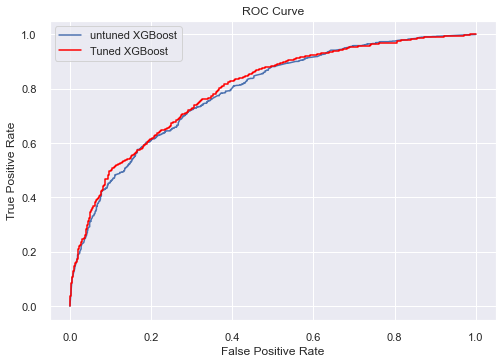

In [112]:
plt.plot(fpr, tpr, label = 'untuned XGBoost')
plt.plot(fpr_t, tpr_t, label = 'Tuned XGBoost', color='red')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

In [119]:
print('untuned XGBoost ROC-AUC:', roc_auc_score(y_val, y_pred_prob))
print('Tuned XGBoost ROC-AUC:', roc_auc_score(y_val, tuned_y_pred_prob))

untuned XGBoost ROC-AUC: 0.7876711227035159
Tuned XGBoost ROC-AUC: 0.796023717136522


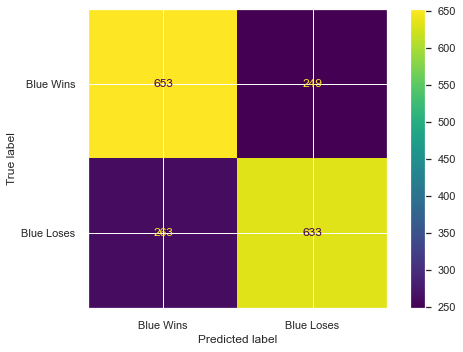

In [103]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_val, y_val,
                      values_format='.0f',
                      display_labels=['Blue Wins', 'Blue Loses']);

In [83]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(final_model, X_val, y_val, n_jobs=16)

pi.keys()

data = {'importances_mean': np.round(pi['importances_mean'], 6),
       'importances_std': pi['importances_std']}

df_pi = pd.DataFrame(data, index= X_val.columns).sort_values(by='importances_mean', ascending=False)

df_pi

,importances_mean,importances_std
bluegolddiff,0.042603,0.007549
blueexperiencediff,0.006674,0.004449
redtotalgold,0.005562,0.003869
bluetotalgold,0.005339,0.002401
redtotalexperience,0.003115,0.000832
redassists,0.002892,0.001134
bluedeaths,0.002670,0.000649
redtotalminionskilled,0.002447,0.001780
redelitemonsters,0.002336,0.001335
blueelitemonsters,0.002113,0.001134


In [84]:
import plotly.express as px

fig = px.bar(df_pi['importances_mean'])
fig.show()

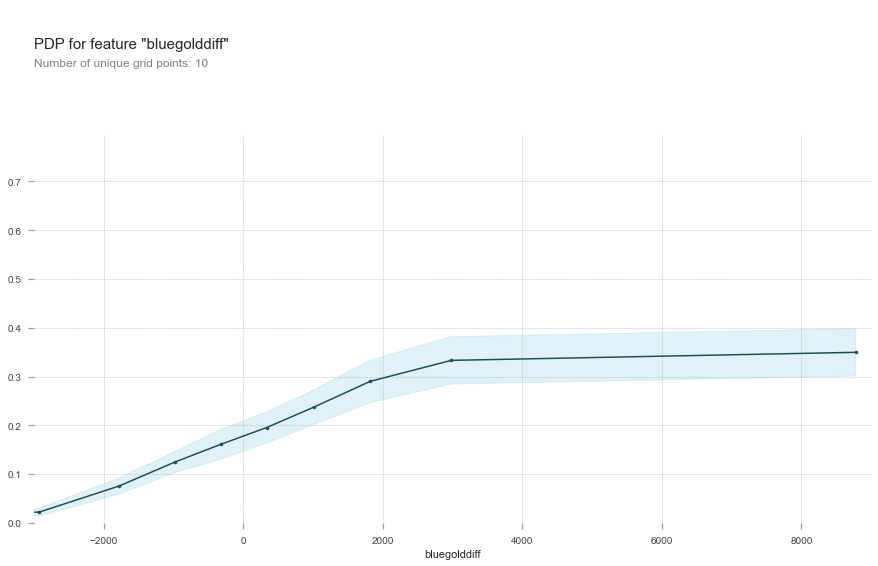

In [85]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'bluegolddiff'

onef_pdp = pdp_isolate(
    model=final_model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(onef_pdp, feature_name=feature)
plt.xlim(-3000,9000)
plt.show()

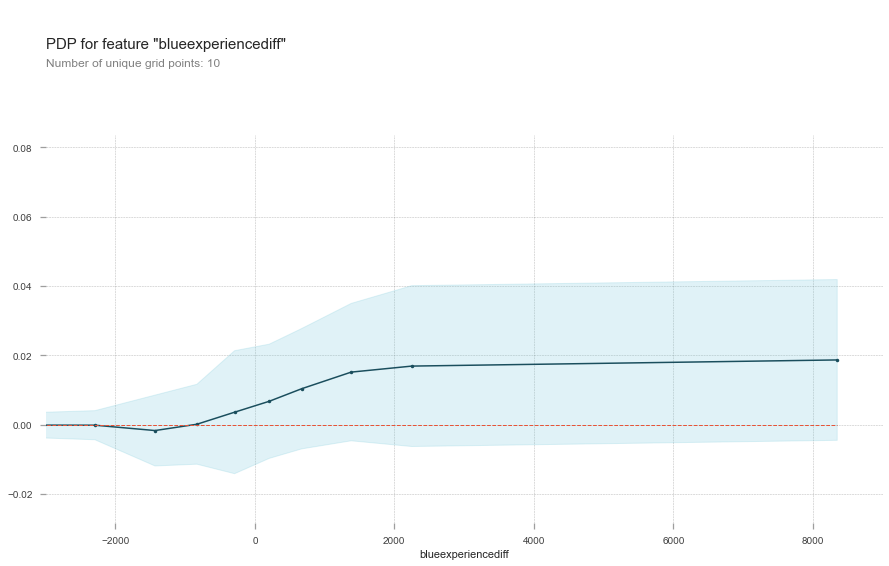

In [26]:
feature = 'blueexperiencediff'

exp_pdp = pdp_isolate(
    model=XGB_model,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

pdp_plot(exp_pdp, feature_name=feature)
plt.xlim(-3000,9000)
plt.show()

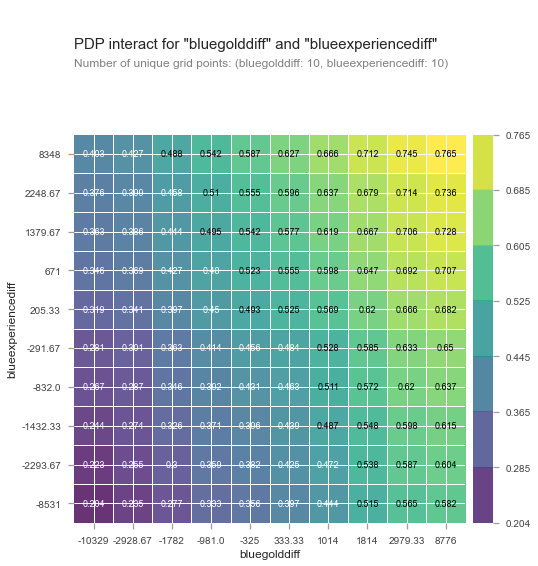

In [117]:
# PDP w Two Features

from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['bluegolddiff', 'blueexperiencediff']

interaction_matrix = pdp_interact(
    model=final_model,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction_matrix, plot_type='grid', feature_names=features)

plt.show()

In [28]:
!pip install shap

In [87]:
final_model

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.03,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=7,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.3, tree_method='exact',
                               validate_parameters=1, verbosity=None)

In [89]:
# Shapley Plots 
import shap


XBCL= XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.03,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1,
                                monotone_constraints='()', n_estimators=100,
                               n_jobs=16, num_parallel_tree=1, random_state=7,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.3, tree_method='exact',
                               validate_parameters=1, verbosity=None)

X_fit= XBCL.fit(X_train, y_train)

mybooster = X_fit.get_booster()

In [90]:
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

In [91]:
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train, y_train)

In [98]:
value = X_train_encoded.iloc[[100]]

In [99]:
value

,bluefirstblood,bluekills,bluedeaths,blueassists,blueelitemonsters,bluedragons,bluetotalgold,bluetotalexperience,bluetotalminionskilled,bluegolddiff,blueexperiencediff,redassists,redelitemonsters,reddragons,redtotalgold,redtotalexperience,redtotalminionskilled
gameId,,,,,,,,,,,,,,,,,
4518528928,0,8,3,8,0,0,17101,17725,214,2294,1989,6,2,1,14807,15736,182


In [97]:
## So our model is predicting a win, lets see why. 
explainer = shap.TreeExplainer(mybooster)
shap_values = explainer.shap_values(value)
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=value
)